In [496]:
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [497]:
def get_input(data_path: str) -> pd.DataFrame:
    """
    Считывание данных и вывод основной информации о наборе данных.

    Parameters
    ----------
    data_path: str
        Название файла.

    Returns
    -------
    data: pandas.core.frame.DataFrame
        Загруженный набор данных в pandas.DataFrame

    """
    base_path = "Data"
    data = pd.read_csv(f"{base_path}/{data_path}")
    data.columns = [col.lower() for col in data.columns]
    print(f"{data_path}: shape = {data.shape[0]} rows, {data.shape[1]} cols")

    return data

def calculate_permutation_importance(estimator, 
                                     metric: callable,
                                     x_valid: pd.DataFrame,
                                     y_valid: pd.Series) -> pd.Series:
    """
    Расчет пермутированной важности признаков.
    """
    scores = {}
    y_pred = estimator.predict(x_valid)
    base_score = metric(y_valid, y_pred)

    for feature in x_valid.columns:
        x_valid_copy = x_valid.copy()
        x_valid_copy[feature] = np.random.permutation(x_valid_copy[feature])

        y_pred = estimator.predict(x_valid_copy)
        score = metric(y_valid, y_pred)
        scores[feature] = base_score - score

    scores = pd.Series(scores)
    scores = scores.sort_values(ascending=False)

    return scores

def linear_regression(fts, target):
    """
    Линейная регрессия.

    Parameters
    ----------
    fts: набор полей для обучения модели 
    target: str
        Название целевого поля.
    
    Returns
    -------
    
    """
    lr = LinearRegression()
    lr.fit(train.loc[:,fts], train[target])
    pred = lr.predict(train.loc[:,fts])
    print("метрика R2 для тренировочного набора train:", r2(train[target], pred))
    pred_valid = lr.predict(valid.loc[:,fts])
    print("метрика R2 для валидационного набора valid:", r2(valid[target], pred_valid))
    mse = MSE(valid['target1'],pred_valid)
    print("метрика MSE:", mse)    
    return lr

def knn(fts, target):
    """
    Линейная регрессия.

    Parameters
    ----------
    fts: набор полей для обучения модели 
    target: str
        Название целевого поля.
    
    Returns
    -------
    
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train.loc[:,fts])
    valid_scaled = scaler.transform(valid.loc[:,fts])
    knn = KNN(n_neighbors=2,weights='distance')
    knn.fit(train_scaled, train[target])
    pred = knn.predict(train_scaled)
    pred_valid = knn.predict(valid_scaled)
    print("метрика R2 для тренировочного набора train:", r2(train[target], pred))
    print("метрика R2 для валидационного набора valid:", r2(valid[target], pred_valid))
    mse = MSE(valid[target],pred_valid)
    print("метрика MSE:", mse)    
    return knn

In [498]:
train = get_input("train_data_200k.csv")
test = get_input("test_data_100k.csv")

train_data_200k.csv: shape = 200000 rows, 84 cols
test_data_100k.csv: shape = 100000 rows, 80 cols


In [499]:
train['target1']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
199995    0.001514
199996    0.001514
199997    0.001516
199998    0.001516
199999    0.001516
Name: target1, Length: 200000, dtype: float64

In [500]:
train['target1'].value_counts()

0.001175    7
0.001172    7
0.001164    6
0.001161    6
0.001160    6
           ..
0.001054    1
0.001302    1
0.001249    1
0.001060    1
0.001220    1
Name: target1, Length: 145297, dtype: int64

Анализ и заполнение пропусков

In [501]:
len(train)

200000

In [502]:
train.isnull().sum()

unnamed: 0         0
tag1              66
tag2           90630
tag3           90544
tag4          199915
               ...  
tag79         151442
target1            9
target2            9
target3            9
target4            9
Length: 84, dtype: int64

In [503]:
for i in range(1, 80):
    tag = 'tag' + str(i)
    train.loc[train[tag].isnull(), tag] = train[tag].median()
    test.loc[test[tag].isnull(), tag] = test[tag].median()

In [504]:
train.isnull().sum()

unnamed: 0    0
tag1          0
tag2          0
tag3          0
tag4          0
             ..
tag79         0
target1       9
target2       9
target3       9
target4       9
Length: 84, dtype: int64

In [505]:
train = train.dropna()

In [506]:
train.isnull().sum()

unnamed: 0    0
tag1          0
tag2          0
tag3          0
tag4          0
             ..
tag79         0
target1       0
target2       0
target3       0
target4       0
Length: 84, dtype: int64

In [507]:
train = train.select_dtypes(include=[np.number])

In [508]:
train.columns

Index(['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7', 'tag8', 'tag9',
       'tag10', 'tag11', 'tag12', 'tag13', 'tag14', 'tag15', 'tag16', 'tag17',
       'tag18', 'tag19', 'tag20', 'tag21', 'tag22', 'tag23', 'tag24', 'tag25',
       'tag26', 'tag27', 'tag28', 'tag29', 'tag30', 'tag31', 'tag32', 'tag33',
       'tag34', 'tag35', 'tag36', 'tag37', 'tag38', 'tag39', 'tag40', 'tag41',
       'tag42', 'tag43', 'tag44', 'tag45', 'tag46', 'tag47', 'tag48', 'tag49',
       'tag50', 'tag51', 'tag52', 'tag53', 'tag54', 'tag55', 'tag56', 'tag57',
       'tag58', 'tag59', 'tag60', 'tag61', 'tag62', 'tag63', 'tag64', 'tag65',
       'tag66', 'tag67', 'tag68', 'tag69', 'tag70', 'tag71', 'tag72', 'tag73',
       'tag74', 'tag75', 'tag76', 'tag77', 'tag78', 'tag79', 'target1',
       'target2', 'target3', 'target4'],
      dtype='object')

Вычисление самых значимых признаков

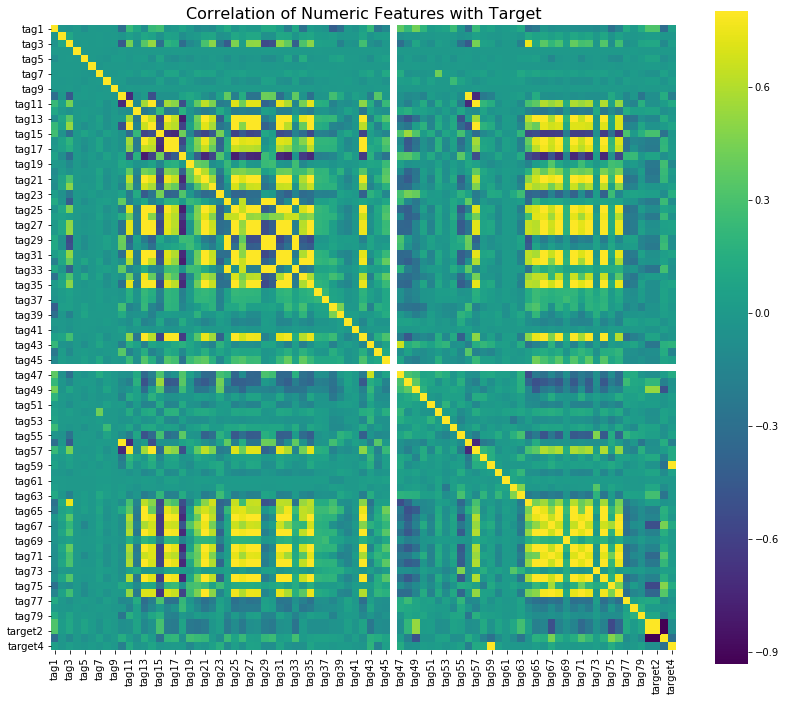

In [509]:
correlation = train.corr()
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Target", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

In [510]:
correlation = train.corr()
corr_with_target1 = abs(correlation["target1"]).sort_values(ascending = False)
corr_with_target1[:15]

target1    1.000000
target2    0.999999
target3    0.930867
tag75      0.551245
tag49      0.527318
tag67      0.505909
tag76      0.361786
tag71      0.339348
tag1       0.313579
tag15      0.292467
tag63      0.273138
tag33      0.263465
tag20      0.248254
tag43      0.243513
tag19      0.233792
Name: target1, dtype: float64

In [511]:
correlation = train.corr()
corr_with_target2 = abs(correlation["target2"]).sort_values(ascending = False)
corr_with_target2[:15]

target2    1.000000
target1    0.999999
target3    0.930863
tag75      0.551238
tag49      0.527308
tag67      0.505919
tag76      0.361785
tag71      0.339353
tag1       0.313583
tag15      0.292483
tag63      0.273164
tag33      0.263476
tag20      0.248262
tag43      0.243605
tag19      0.233796
Name: target2, dtype: float64

In [512]:
correlation = train.corr()
corr_with_target3 = abs(correlation["target3"]).sort_values(ascending = False)
corr_with_target3[:15]

target3    1.000000
target1    0.930867
target2    0.930863
tag49      0.491134
tag75      0.478502
tag67      0.442331
tag76      0.340938
tag71      0.321700
tag1       0.314601
target4    0.295557
tag33      0.277791
tag59      0.275681
tag15      0.273974
tag19      0.266316
tag63      0.257671
Name: target3, dtype: float64

In [513]:
correlation = train.corr()
corr_with_target4 = abs(correlation["target4"]).sort_values(ascending = False)
corr_with_target4[:15]

target4    1.000000
tag59      0.863171
target3    0.295557
tag43      0.186575
tag10      0.186330
tag56      0.186330
tag44      0.157830
tag23      0.152919
tag75      0.135257
tag47      0.123957
tag58      0.116089
tag19      0.115599
tag67      0.115488
tag11      0.115066
tag57      0.115066
Name: target4, dtype: float64

In [514]:
train, valid = train_test_split(train, test_size=0.3, random_state=42)

масштабирование

In [515]:
#хорошо бы сделать стандартизацию (нормализацию)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.loc[:,fts])
valid_scaled = scaler.transform(valid.loc[:,fts])

In [516]:
#составляем список фич, которые необходимо исключить из модели
feaches_need_drop = ['target1', 'target2', 'target3','target4', 'tag2', 'tag3']
#значения 'tag2', 'tag3' отсутвуют в тестовом наборе

линейная регрессия

In [517]:
target = 'target1'
feaches_top10_corr_1 = corr_with_target1.index.drop(feaches_need_drop)[:10]
fts = corr_with_target1.index.drop(feaches_need_drop)
fts1 = fts
fts2 = fts
fts3 = fts
fts4 = fts
feaches_top10_corr_1

Index(['tag75', 'tag49', 'tag67', 'tag76', 'tag71', 'tag1', 'tag15', 'tag63',
       'tag33', 'tag20'],
      dtype='object')

In [518]:
lr1 = linear_regression(fts1, target)

метрика R2 для тренировочного набора train: 0.8803838389424321
метрика R2 для валидационного набора valid: 0.8830285721269555
метрика MSE: 8.618177610181336e-10


In [519]:
feaches_top10_corr_2 = corr_with_target2.index.drop(feaches_need_drop)[:10]
feaches_top10_corr_2

Index(['tag75', 'tag49', 'tag67', 'tag76', 'tag71', 'tag1', 'tag15', 'tag63',
       'tag33', 'tag20'],
      dtype='object')

In [520]:
target = 'target2'
lr2 = linear_regression(fts2, target)

метрика R2 для тренировочного набора train: 0.8804134445964477
метрика R2 для валидационного набора valid: 0.8830645552398828
метрика MSE: 0.0023842399951070747


In [521]:
feaches_top10_corr_3 = corr_with_target3.index.drop(feaches_need_drop)[:10]
feaches_top10_corr_3

Index(['tag49', 'tag75', 'tag67', 'tag76', 'tag71', 'tag1', 'tag33', 'tag59',
       'tag15', 'tag19'],
      dtype='object')

In [522]:
target = 'target3'
lr3 = linear_regression(fts3, target)

метрика R2 для тренировочного набора train: 0.8423070304576468
метрика R2 для валидационного набора valid: 0.8465723786096886
метрика MSE: 0.8859632633467813


In [523]:
feaches_top10_corr_4 = corr_with_target4.index.drop(feaches_need_drop)[:10]
feaches_top10_corr_4

Index(['tag59', 'tag43', 'tag10', 'tag56', 'tag44', 'tag23', 'tag75', 'tag47',
       'tag58', 'tag19'],
      dtype='object')

In [524]:
target = 'target4'
lr4 = linear_regression(fts4, target)

метрика R2 для тренировочного набора train: 0.7687869113748224
метрика R2 для валидационного набора valid: 0.7831571513422031
метрика MSE: 3.09103521967489e-05


RF

In [525]:
from sklearn.ensemble import RandomForestRegressor as RF

In [526]:
for i in range(10,5,-1):
    print(f'max_depth={i}')
    clf = RF(max_depth=i, n_estimators=60, max_features=3, random_state=100)
    clf.fit(train.loc[:,fts], train['target4'])
    pred = clf.predict(train.loc[:,fts4])
    print(r2(train['target4'],pred))
    pred_valid = clf.predict(valid.loc[:,fts4])
    print(r2(valid['target4'],pred_valid))
    print()

max_depth=10
0.8298890298138835
0.8248067959634484

max_depth=9
0.761957868713421
0.7574586984099565

max_depth=8
0.7054269436448295
0.7011524440088903

max_depth=7
0.592922461992772
0.5890706457885719

max_depth=6
0.54494792363674
0.54332679028028



In [527]:
clf = RF(max_depth=10,n_estimators=60,max_features=3,random_state=100)

In [528]:
clf.fit(train.loc[:,fts4],train['target4'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=None, oob_score=False, random_state=100,
           verbose=0, warm_start=False)

In [529]:
pred = clf.predict(train.loc[:,fts4])

In [530]:
r2(train['target4'], pred)

0.8298890298138835

In [531]:
pred_valid = clf.predict(valid.loc[:,fts])

In [532]:
r2(valid['target4'],pred_valid)

0.8248067959634484

In [533]:
MSE(valid['target4'],pred_valid)

3.6359023228509343e-07

KNN

In [534]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [535]:
target = 'target1'
knn1 = knn(fts1, target)

метрика R2 для тренировочного набора train: 1.0
метрика R2 для валидационного набора valid: 0.9216298085181513
метрика MSE: 5.774129988970897e-10


In [536]:
target = 'target2'
knn2 = knn(fts2, target)

метрика R2 для тренировочного набора train: 1.0
метрика R2 для валидационного набора valid: 0.9217147505000487
метрика MSE: 1.0715199292218468e-06


In [537]:
target = 'target3'
knn3 = knn(fts3, target)

метрика R2 для тренировочного набора train: 1.0
метрика R2 для валидационного набора valid: 0.9233667399046295
метрика MSE: 1.1991990975509332e-06


In [538]:
target = 'target4'
knn4 = knn(fts4, target)

метрика R2 для тренировочного набора train: 1.0
метрика R2 для валидационного набора valid: 0.9661153594894296
метрика MSE: 7.032307207284568e-08


Вывод: самая лучшая модель KNN (метод ближайших соседей). Она дает наилучшие предсказания, но тренируется и предсказывает очень долго! Поэтому решил использовать оба метода: быстрый - линейную регрессию (lr) и медленный - КNN (knn).

In [539]:
test_id = test['unnamed: 0']

In [540]:
test.isnull().sum()[:50]

unnamed: 0         0
tag1               0
tag2          100000
tag3          100000
tag4               0
tag5               0
tag6               0
tag7               0
tag8               0
tag9               0
tag10              0
tag11              0
tag12              0
tag13              0
tag14              0
tag15              0
tag16              0
tag17              0
tag18              0
tag19              0
tag20              0
tag21              0
tag22              0
tag23              0
tag24              0
tag25              0
tag26              0
tag27              0
tag28              0
tag29              0
tag30              0
tag31              0
tag32              0
tag33              0
tag34              0
tag35              0
tag36              0
tag37              0
tag38              0
tag39              0
tag40              0
tag41              0
tag42              0
tag43              0
tag44              0
tag45              0
tag46              0
tag47        

In [541]:
test_target1 = lr1.predict(test.loc[:,fts1])
test_target2 = lr2.predict(test.loc[:,fts2])
test_target3 = lr3.predict(test.loc[:,fts3])
test_target4 = lr4.predict(test.loc[:,fts4])

In [551]:
y_pred = pd.DataFrame({
    "TIME": test_id,
    "TARGET1": test_target1,
    "TARGET2": test_target2,
    "TARGET3": test_target3,
    "TARGET4": test_target4

})
y_pred.to_csv("./Data/lr_VZinchenko_result_pred.csv",index=False)

In [552]:
test_target1 = knn1.predict(test.loc[:,fts1])
test_target2 = knn2.predict(test.loc[:,fts2])
test_target3 = knn3.predict(test.loc[:,fts3])
test_target4 = knn4.predict(test.loc[:,fts4])

In [553]:
y_pred = pd.DataFrame({
    "TIME": test_id,
    "TARGET1": test_target1,
    "TARGET2": test_target2,
    "TARGET3": test_target3,
    "TARGET4": test_target4

})
y_pred.to_csv("./Data/knn_VZinchenko_result_pred.csv",index=False)

In [545]:
#подсчет важности каждого признака
perm_importance1 = calculate_permutation_importance(
    estimator=lr1, metric=r2, x_valid=valid.loc[:,fts1], y_valid=valid['target1']#target
)
perm_importance2 = calculate_permutation_importance(
    estimator=lr2, metric=r2, x_valid=valid.loc[:,fts2], y_valid=valid['target2']#target
)
perm_importance3 = calculate_permutation_importance(
    estimator=lr3, metric=r2, x_valid=valid.loc[:,fts3], y_valid=valid['target3']#target
)
perm_importance4 = calculate_permutation_importance(
    estimator=lr4, metric=r2, x_valid=valid.loc[:,fts4], y_valid=valid['target4']#target
)

In [546]:
perm_importance1[:10]

tag11    2.140814e+24
tag57    2.131544e+24
tag56    1.013351e+23
tag10    1.011670e+23
tag27    2.369873e+00
tag31    2.344888e+00
tag42    1.614117e+00
tag66    1.044379e+00
tag35    8.394410e-01
tag49    8.378347e-01
dtype: float64

In [547]:
perm_importance2[:10]

tag11    2.157072e+24
tag57    2.151861e+24
tag56    1.018609e+23
tag10    1.011395e+23
tag27    2.369290e+00
tag31    2.354851e+00
tag42    1.633135e+00
tag66    1.049138e+00
tag35    8.422171e-01
tag49    8.297864e-01
dtype: float64

In [548]:
perm_importance3[:10]

tag11    1.275726e+24
tag57    1.265330e+24
tag56    6.015996e+22
tag10    6.008294e+22
tag27    2.922384e+00
tag31    1.620898e+00
tag42    1.570379e+00
tag66    9.600736e-01
tag49    6.928653e-01
tag25    5.258137e-01
dtype: float64

In [549]:
perm_importance4[:10]

tag57    5.639948e+23
tag11    5.632696e+23
tag56    2.660504e+22
tag10    2.657049e+22
tag59    1.274376e+00
tag27    4.100922e-01
tag70    3.284016e-01
tag25    2.993473e-01
tag31    2.921230e-01
tag35    2.246269e-01
dtype: float64

In [550]:
feaches_top10_corr_1 

Index(['tag75', 'tag49', 'tag67', 'tag76', 'tag71', 'tag1', 'tag15', 'tag63',
       'tag33', 'tag20'],
      dtype='object')